In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


### Load Iris.csv and Store to SQLite

In [3]:
# Load CSV
df = pd.read_csv("Iris.csv")  # Ensure this CSV is in your working directory

df.head()




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
import sqlite3  # ✅ Add this if not already imported

# Store into SQLite database
conn = sqlite3.connect("database.sqlite")
df.to_sql("iris_table", conn, if_exists="replace", index=False)
conn.commit()


In [7]:
# Load data back from SQLite
df_sql = pd.read_sql("SELECT * FROM iris_table", conn)
conn.close()


In [9]:
from sklearn.preprocessing import LabelEncoder  # ✅ Make sure this is imported

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


### preprocessing

In [11]:
# Separate features and labels
X = df_sql.drop("Species", axis=1)
y = df_sql["Species"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)



### Train & Evaluate with Different K

In [12]:
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} → Accuracy: {acc:.2f}")


K=1 → Accuracy: 1.00
K=2 → Accuracy: 1.00
K=3 → Accuracy: 1.00
K=4 → Accuracy: 1.00
K=5 → Accuracy: 1.00
K=6 → Accuracy: 1.00
K=7 → Accuracy: 1.00
K=8 → Accuracy: 1.00
K=9 → Accuracy: 1.00
K=10 → Accuracy: 1.00


### Confusion Matrix for Best K

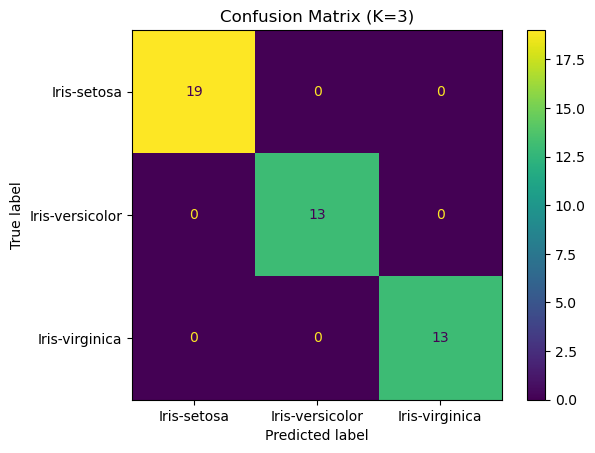

In [13]:
best_k = 3  # You can set this based on above results
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()


###  Visualize Decision Boundaries (using first 2 features)

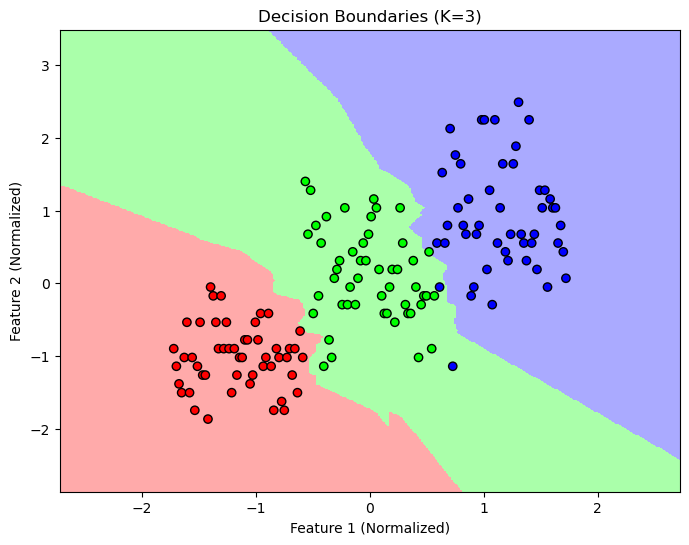

In [18]:
# 🗺 Visualize Decision Boundaries (using first 2 features only)
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_encoded, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_vis, y_train_vis)

# Create mesh grid
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_encoded, edgecolor='k',
            cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title(f"Decision Boundaries (K={best_k})")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.show()
